#### Fig4E - Density plots
#### University of Cambridge
#### Mariana Quiroga Londoño
#### 04-02-20

In [2]:
#SETTING ENVIRONMENT 
import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

In [3]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [12]:
#adata=sc.read(""h5da_part4/050221_mq224_mRNA_Progenitors_only_postHarmony_ccfiltered_DEG_P4_sorted_annotations_FBMS2-3-H3-F3-E5_CB-G7_FL-A7-A6-C5.h5ad")

In [13]:
from scipy import stats

def cell_kde(adata,
             coords = 'X_draw_graph_fa',
             bw_method = None,
             estimate_cell_densities = True):
    kde = stats.gaussian_kde(adata.obsm[coords].T, bw_method = bw_method)
    if estimate_cell_densities:
        return(kde(adata.obsm[coords].T))
    else:
        return(kde)

In [14]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 


In [15]:
#Because CB cells contains less cells than the rest of the tissues ~7500, we do a random sampling of that size 
#to show comparable densities between the 3 tissues.

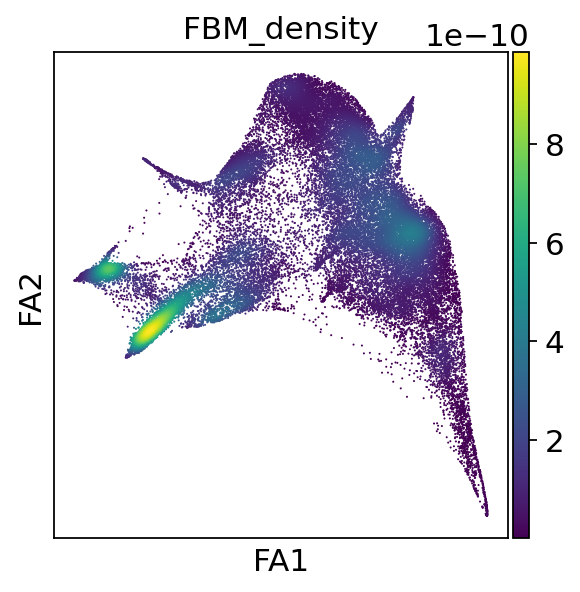

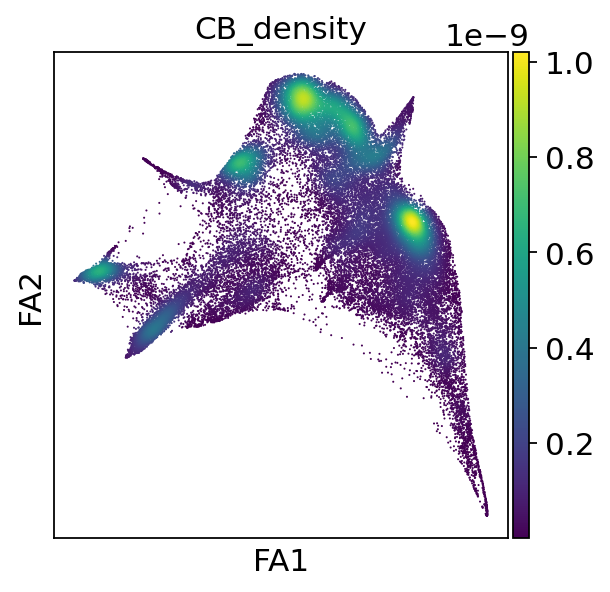

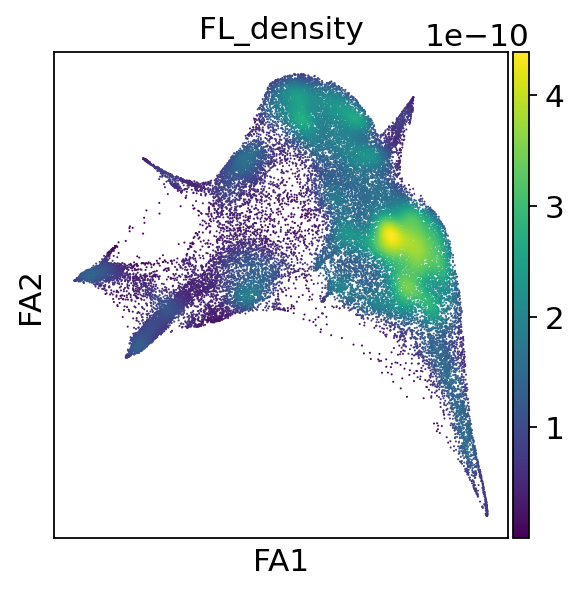

In [16]:
for i in adata.obs.Tissue.unique():
    temp = adata[adata.obs.index[adata.obs.Tissue == i],:].copy()
    sc.pp.subsample(temp, n_obs = 7500)
    kdf = cell_kde(temp,bw_method = 0.1,estimate_cell_densities = False)
    adata.obs[i + '_density'] = kdf(adata.obsm['X_draw_graph_fa'].T)
    sc.pl.draw_graph(adata, color = i + '_density')

### Trying different palettes

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()
#'plasma', 'YlGnBu' and maybe just plain old 'rainbow

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

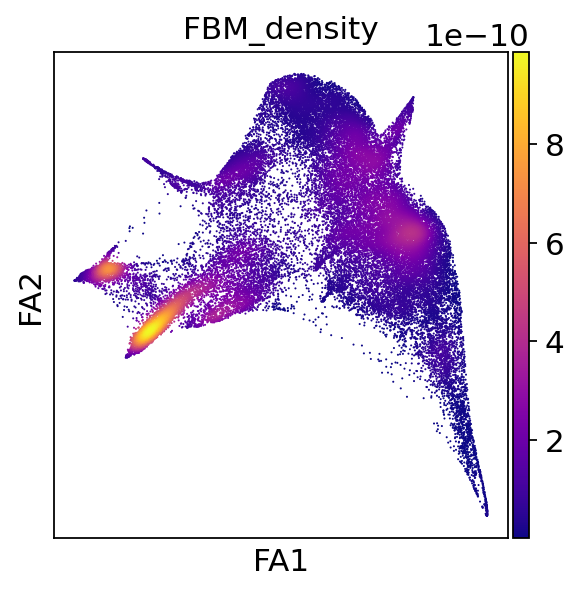

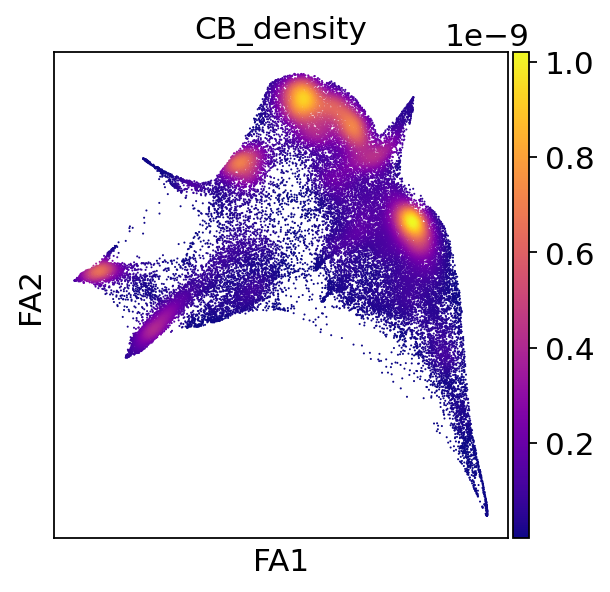

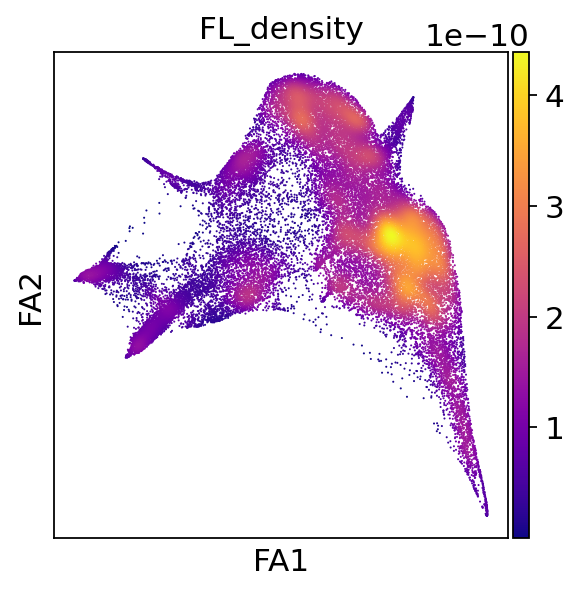

In [18]:
#PLASMA 
for i in adata.obs.Tissue.unique():
    temp = adata[adata.obs.index[adata.obs.Tissue == i],:].copy()
    sc.pp.subsample(temp, n_obs = 7500)
    kdf = cell_kde(temp,bw_method = 0.1,estimate_cell_densities = False)
    adata.obs[i + '_density'] = kdf(adata.obsm['X_draw_graph_fa'].T)
    sc.pl.draw_graph(adata, color = i + '_density', cmap=cmaps['Perceptually Uniform Sequential'][1])

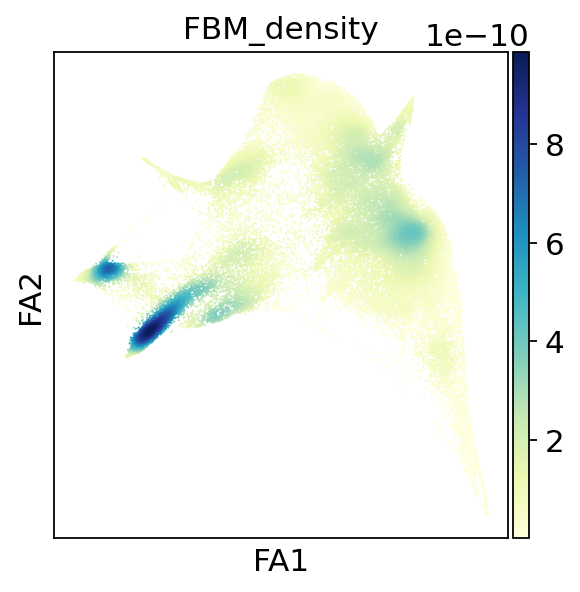

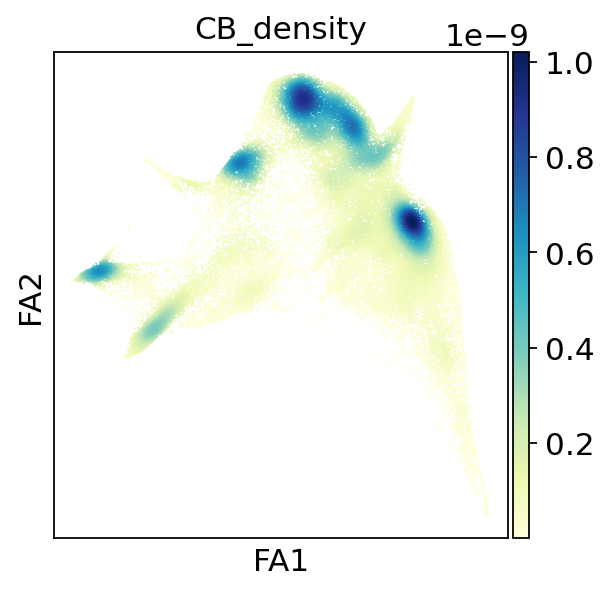

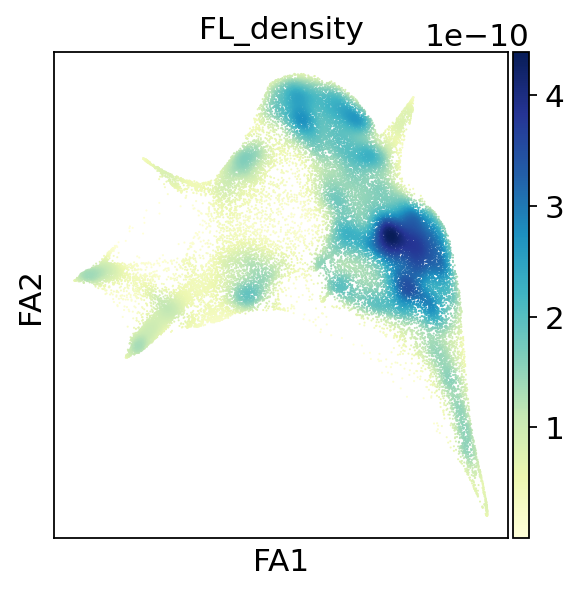

In [19]:
#'YlGnBu'
for i in adata.obs.Tissue.unique():
    temp = adata[adata.obs.index[adata.obs.Tissue == i],:].copy()
    sc.pp.subsample(temp, n_obs = 7500)
    kdf = cell_kde(temp,bw_method = 0.1,estimate_cell_densities = False)
    adata.obs[i + '_density'] = kdf(adata.obsm['X_draw_graph_fa'].T)
    sc.pl.draw_graph(adata, color = i + '_density', cmap=cmaps['Sequential'][14])

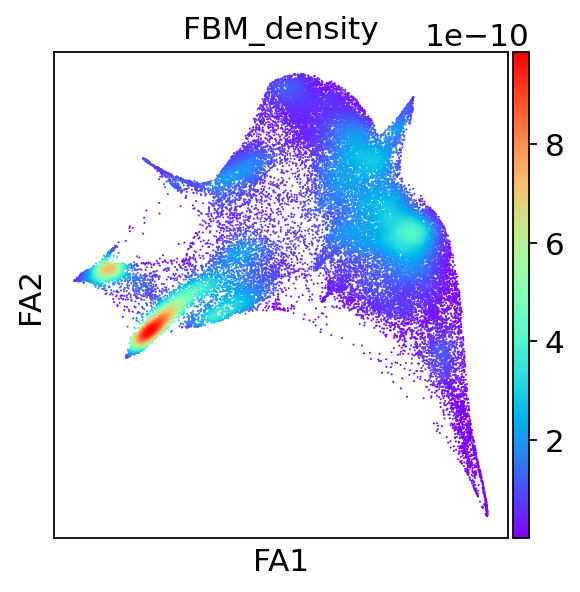

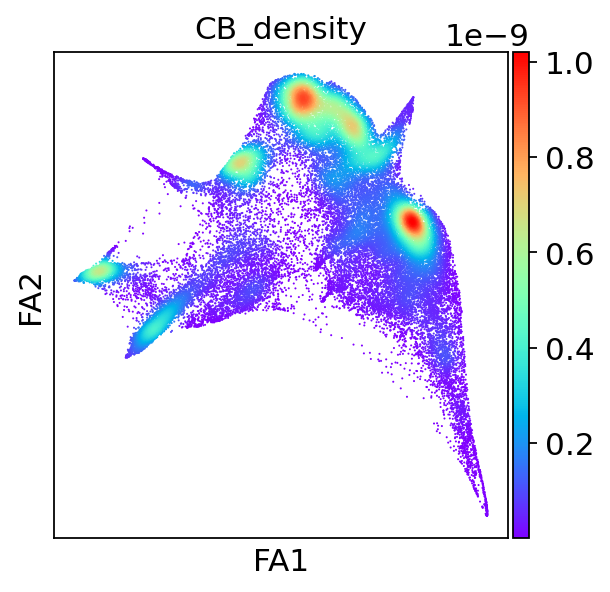

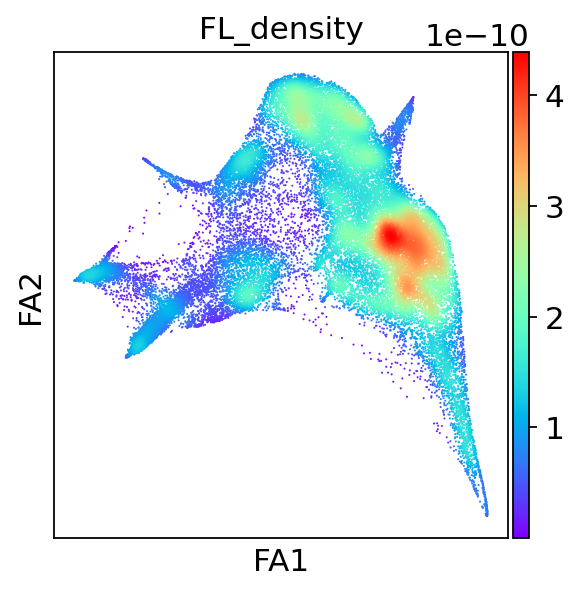

In [20]:
#'rainbow'
for i in adata.obs.Tissue.unique():
    temp = adata[adata.obs.index[adata.obs.Tissue == i],:].copy()
    sc.pp.subsample(temp, n_obs = 7500)
    kdf = cell_kde(temp,bw_method = 0.1,estimate_cell_densities = False)
    adata.obs[i + '_density'] = kdf(adata.obsm['X_draw_graph_fa'].T)
    sc.pl.draw_graph(adata, color = i + '_density', cmap=cmaps['Miscellaneous'][12], save=i+"_fig4_density_plot")

In [39]:
def draw_graph_fa_cell_abundance(adata, key, subsample_to = None, file = None, density_plots = False, bw = None):
    import anndata as an
    import seaborn as sns
    from scanpy.plotting.palettes import default_20
    import matplotlib.pyplot as plt


    catno = len(adata.obs[key].unique())
    
    #Getting the limits
    xlim = (1.2*min(adata.obsm['X_draw_graph_fa'][:,0]), 1.2*max(adata.obsm['X_draw_graph_fa'][:,0]))
    ylim = (1.2*min(adata.obsm['X_draw_graph_fa'][:,1]), 1.2*max(adata.obsm['X_draw_graph_fa'][:,1]))


    
    if catno <= 8:
        fig, axes = plt.subplots(nrows=1, ncols=catno)
        fig.set_size_inches(7*catno, 5)


        x = []
        for n, i in enumerate(adata.obs[key].cat.categories):
            sub = adata[adata.obs[key].isin([i])].copy()
            if subsample_to is not None:
                sc.pp.subsample(sub, n_obs = subsample_to)
                if density_plots:
                    #Note this kdeplot syntax works with seaborn 10.1 but not 11!
                    sns.kdeplot(data = sub.obsm['X_draw_graph_fa'][:,0],
                                data2 = sub.obsm['X_draw_graph_fa'][:,1],
                                shade = True, 
                                shade_lowest = False,
                                bw = bw,
                            ax = axes[n]) 
                    # color = default_20[n]
                    axes[n].set_title(i)
                else:
                    sc.pl.draw_graph(sub, color = [key], 
                           alpha = 0.7,
                           ax = axes[n], show = False, frameon = True)
            axes[n].set_xlim(xlim)
            axes[n].set_ylim(ylim)
            for i in axes: i.axes.set_box_aspect(1)
        
    fig.tight_layout()
    if file is not None:
        plt.savefig(file)
    else:
        fig.show()


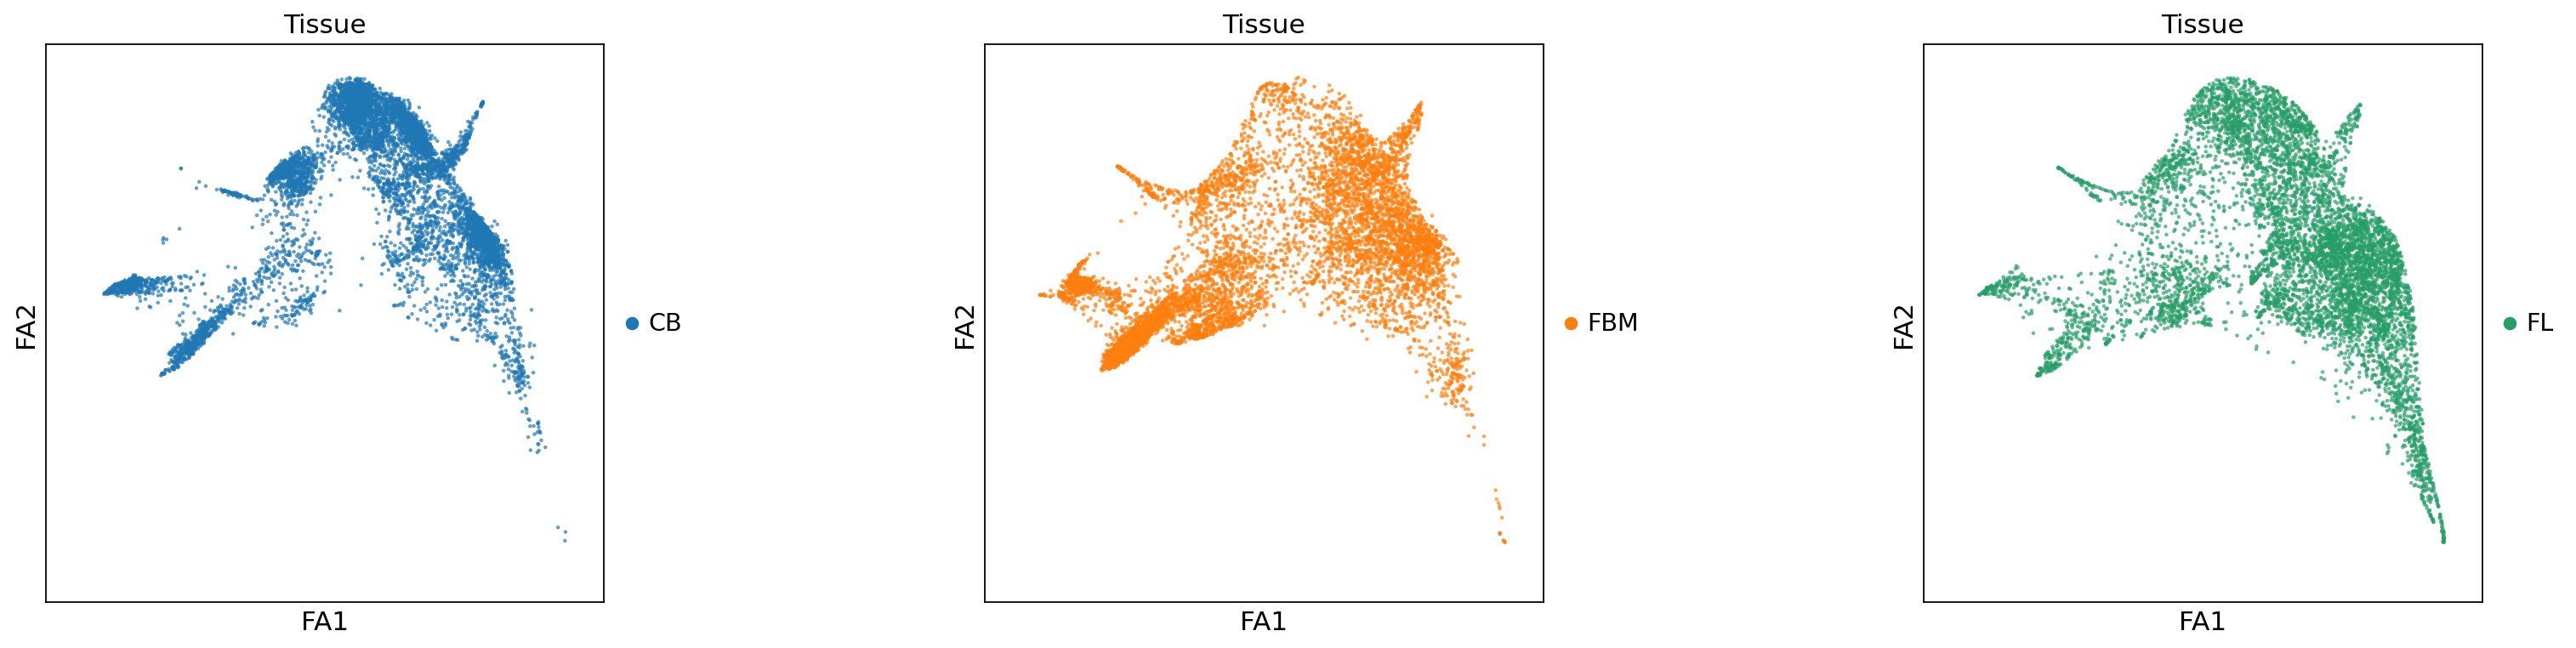

In [40]:
draw_graph_fa_cell_abundance(adata, key = 'Tissue', subsample_to = 7500)

In [55]:
#New attempt


def draw_graph_fa_cell_abundance(adata, key, subsample_to = None, file = None, density_plots = False, bw = None, levels = 10):

    import anndata as an
    import seaborn as sns
    from scanpy.plotting.palettes import default_20
    import matplotlib.pyplot as plt
    

    catno = len(adata.obs[key].unique())
    
    #Getting the limits
    xlim = (1.2*min(adata.obsm['X_draw_graph_fa'][:,0]), 1.2*max(adata.obsm['X_draw_graph_fa'][:,0]))
    ylim = (1.2*min(adata.obsm['X_draw_graph_fa'][:,1]), 1.2*max(adata.obsm['X_draw_graph_fa'][:,1]))


    
    if catno <= 8:
        fig, axes = plt.subplots(nrows=1, ncols=catno)
        fig.set_size_inches(7*catno, 5)


        x = []
        for n, i in enumerate(adata.obs[key].cat.categories):
            sub = adata[adata.obs[key].isin([i])].copy()
            if subsample_to is not None:
                sc.pp.subsample(sub, n_obs = subsample_to)
                if density_plots:
                    #Note this kdeplot syntax works with seaborn 10.1 but not 11!
                    sns.kdeplot(data = sub.obsm['X_draw_graph_fa'][:,0],
                        data2 = sub.obsm['X_draw_graph_fa'][:,1],
                        shade = True,
                        shade_lowest = False,
                        bw = bw,
                        ax = axes[n],
                        levels = levels)
                    # color = default_20[n]
                    axes[n].set_title(i)
                else:
                    sc.pl.draw_graph(sub, color = [key], 
                           alpha = 0.7,
                           ax = axes[n], show = False, frameon = True)
            axes[n].set_xlim(xlim)
            axes[n].set_ylim(ylim)
            for i in axes: i.axes.set_box_aspect(1)
        
    fig.tight_layout()
    if file is not None:
        plt.savefig(file)
    else:
        fig.show()







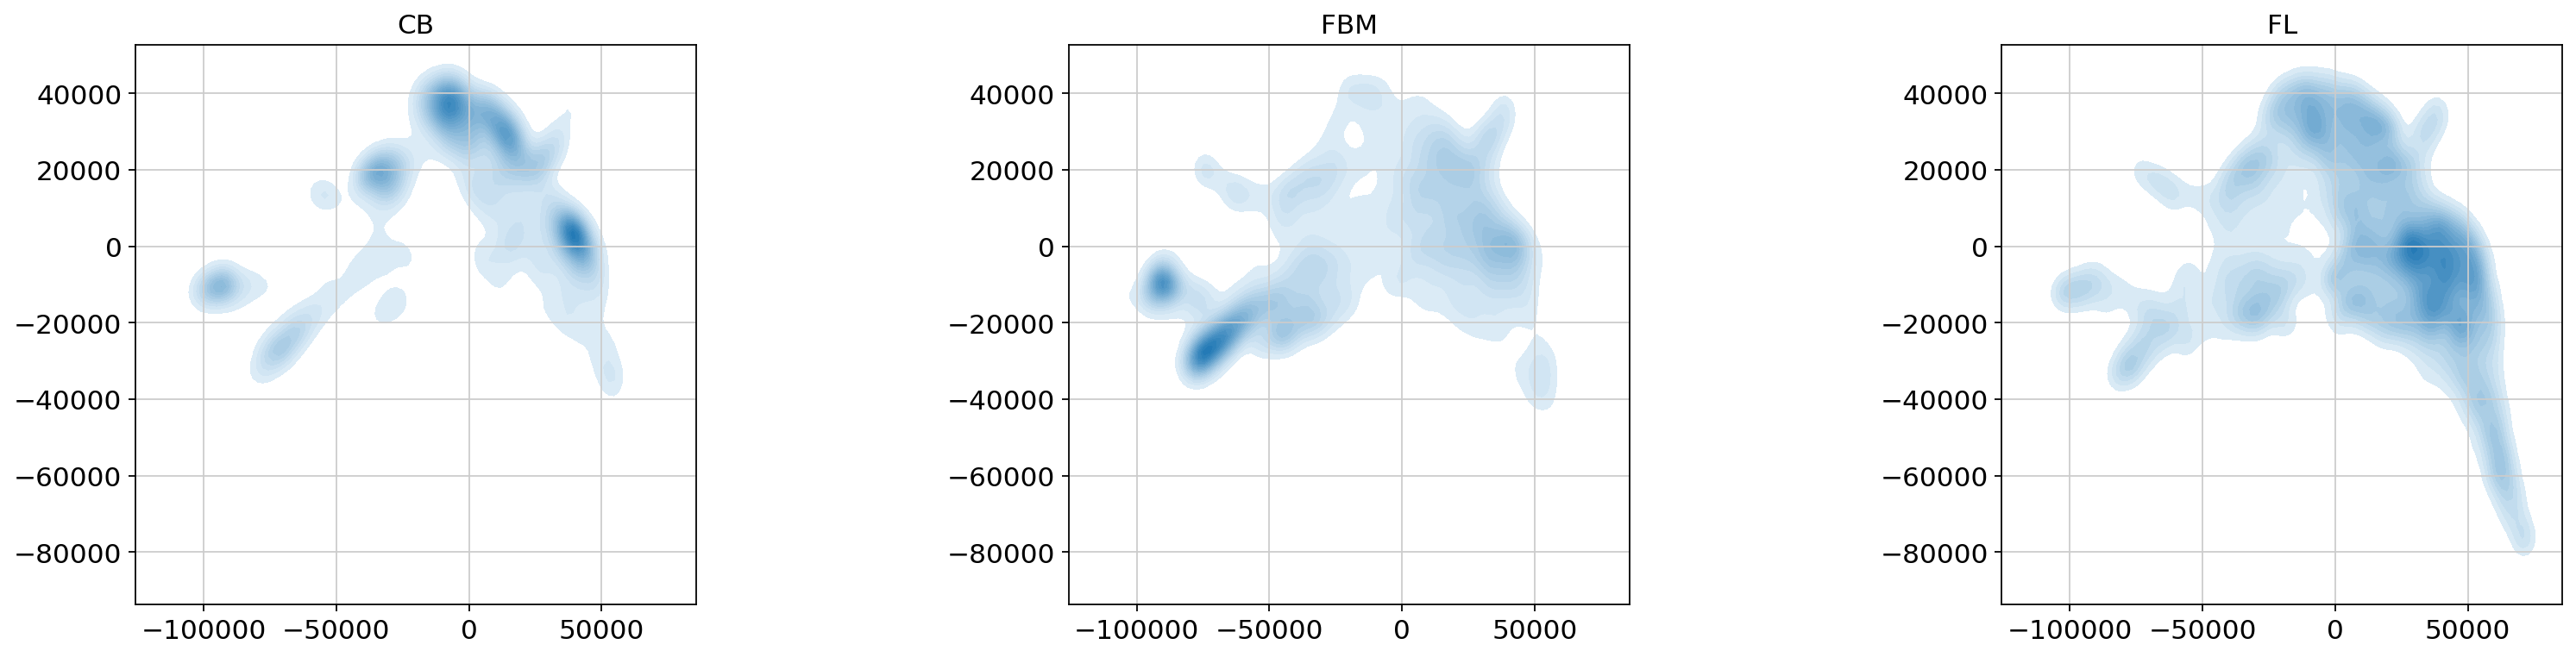

In [56]:
draw_graph_fa_cell_abundance(adata, key = 'Tissue', subsample_to = 7500, density_plots = True, bw = 3000, levels = 20)

In [42]:
!pip list 

Package                           Version
--------------------------------- --------------------
alabaster                         0.7.8
altair                            4.1.0
anndata                           0.7.4
annoy                             1.16.3
appdirs                           1.4.3
arrow                             0.15.5
atomicwrites                      1.3.0
attrs                             18.2.0
Babel                             2.6.0
backcall                          0.1.0
bash-kernel                       0.7.2
batchglm                          0.7.3
bbknn                             1.3.7
beautifulsoup4                    4.8.2
bioinfokit                        0.7.1
bioservices                       1.6.0
bleach                            3.1.0
bokeh                             1.4.0
boto3                             1.12.49
botocore                          1.15.49
cellrank                          1.0.0
certifi                           2020.6.20
cffi        

You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
